In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation

In [4]:
# Path to the directory containing the images
imgs_path = "/content/drive/MyDrive/Cse_465/Code/Fruits/"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 10  # number of most similar images to retrieve

# Load the pre-trained ResNet101V2 model
convlayer = ResNet101V2(input_shape=(imgs_model_width, imgs_model_height, 3), weights='imagenet', include_top=False)

# Create a sequential model
model = Sequential()
model.add(convlayer)
model.add(Flatten())


171317808/171317808 [==============================] - 5s 0us/step


In [5]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 42,626,560
Trainable params: 42,528,896
Non-trainable params: 97,664
_________________________________________________________________


In [6]:
from keras.applications import ResNet101V2
from keras.models import Model

# Create a feature extractor model
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("flatten").output)

# Display feature extractor model summary
feat_extractor.summary()

# Retrieve the list of image files
files = [os.path.join(imgs_path, x) for x in os.listdir(imgs_path) if x.endswith(("jpg", "jpeg"))]

print("Number of images:", len(files))
print(files)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2_input (InputLay  [(None, 224, 224, 3)]    0         
 er)                                                             
                                                                 
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 42,626,560
Trainable params: 42,528,896
Non-trainable params: 97,664
_________________________________________________________________
Number of images: 300
['/content/drive/MyDrive/Cse_465/Code/Fruits/Apple_5.jpg', '/content/drive/MyDrive/Cse_465/Code/Fruits/Apple_9.jpg', '/content/drive/MyDrive/Cse_465/Code/Fruits/Apple_7.jpg', '/content/drive/MyDrive/Cse_465/Code/Fruits/A

In [7]:

# Function to load and preprocess an image
def preprocess_image(image_path):
    original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
    numpy_image = img_to_array(original)
    processed_image = preprocess_input(np.expand_dims(numpy_image, axis=0).copy())
    return processed_image

# Load and preprocess all the images
images = np.vstack([preprocess_image(file) for file in files])

# Extract features from the images
imgs_features = feat_extractor.predict(images)

print("Features successfully extracted!")
print("Number of image features:", imgs_features.shape[0])

10/10 [==============================] - 12s 210ms/step
Features successfully extracted!
Number of image features: 300


In [8]:
# Compute cosine similarity between image features
cos_similarities = cosine_similarity(imgs_features)

# Create a DataFrame with cosine similarities
cos_similarities_df = pd.DataFrame(cos_similarities, columns=files, index=files)
cos_similarities_df.head()

/content/drive/MyDrive/Cse_465/Code/Fruits/Apple_5.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           1.000000        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.717066        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.841484        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.528215        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.800952        

                                                    /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_9.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.717066        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           1.000001        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.878149        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.600769        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.904364        

                                                    /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_7.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.841484        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.878149        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           1.000000        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.561943        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.949085        

                                                    /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_6.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.528215        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.600769        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.561943        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           1.000000        
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.675177        

                                                    /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_15.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.800952         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.904364         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.949085         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.675177         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           1.000000         

                                                    /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_21.jpg  \
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.661583         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.740866         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.793001         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.716453         
/content/drive/MyDrive/Cse_465/Code/Fruits/Appl...                                           0.849942         

                                                    /content/drive/MyDrive

## **RESNET101V2**

***********************************************************************
The Original product:


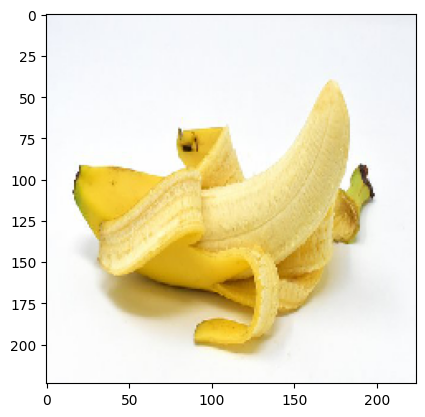

***********************************************************************
Best Match products:


<ipython-input-9-c9394ae0bdf2>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for image_path, similarity_score in closest_imgs.iteritems():


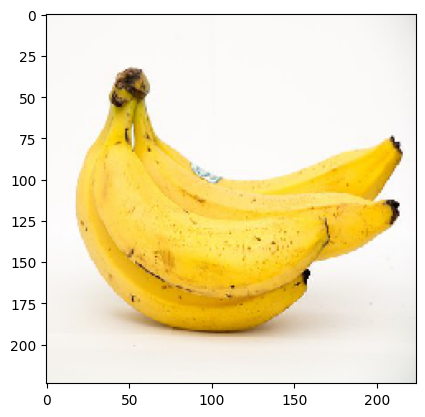

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_6.jpg
Similarity Score:  0.9713639616966248
--------------------------------------


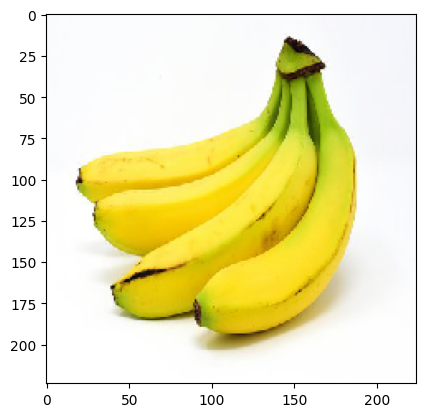

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_9.jpg
Similarity Score:  0.9712616205215454
--------------------------------------


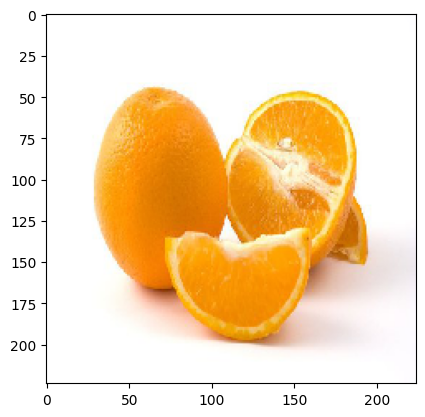

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_48.jpg
Similarity Score:  0.9548022747039795
--------------------------------------


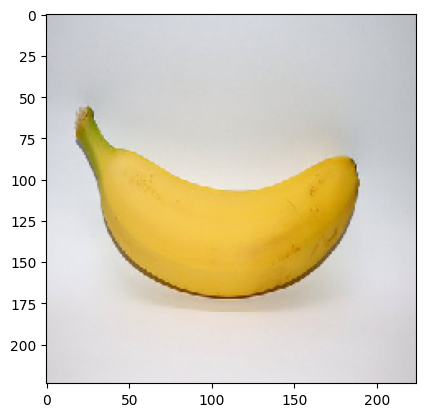

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_14.jpg
Similarity Score:  0.9536985754966736
--------------------------------------


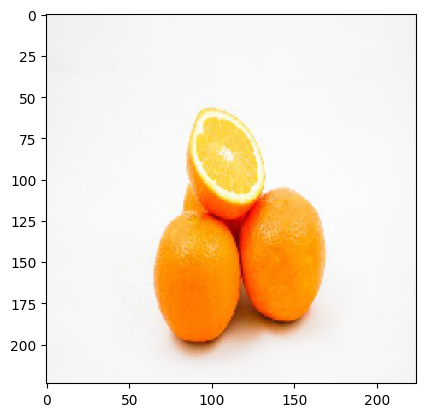

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_8.jpg
Similarity Score:  0.9516149759292603
--------------------------------------


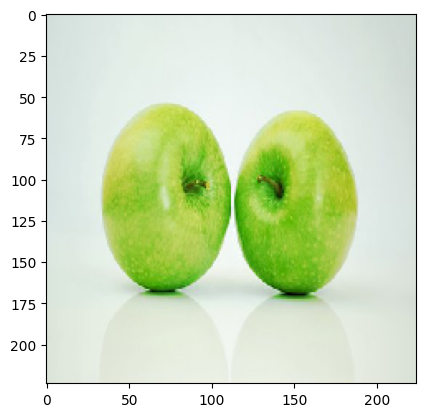

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_25.jpg
Similarity Score:  0.9468469023704529
--------------------------------------


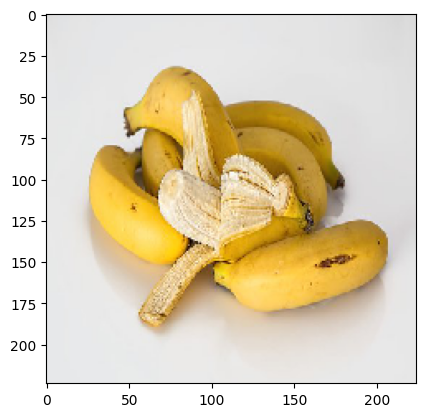

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_2.jpg
Similarity Score:  0.943619430065155
--------------------------------------


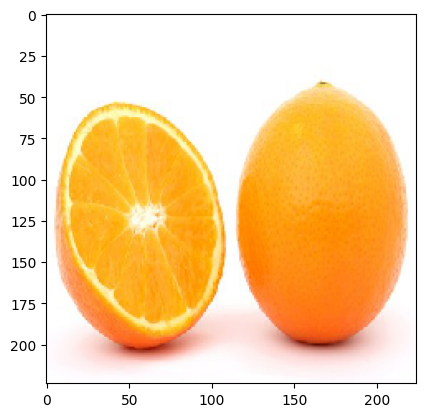

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_13.jpg
Similarity Score:  0.9418309926986694
--------------------------------------


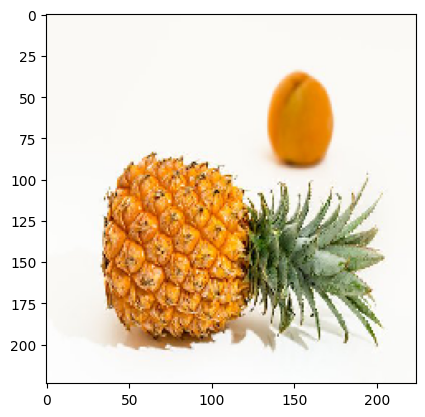

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Pineapple_11.jpg
Similarity Score:  0.9409960508346558
--------------------------------------


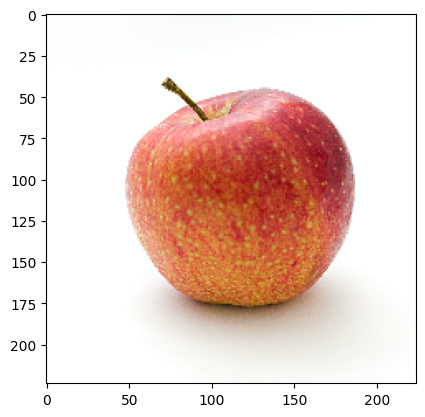

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_2.jpg
Similarity Score:  0.9390165209770203
--------------------------------------


In [9]:
# Function to retrieve most similar products
def retrieve_most_similar_products(given_img):
    print("***********************************************************************")
    print("The Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("***********************************************************************")
    print("Best Match products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for image_path, similarity_score in closest_imgs.iteritems():
        original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Image Path: ", image_path)
        print("Similarity Score: ", similarity_score)
        print("--------------------------------------")

# Test the function with a given image
retrieve_most_similar_products(files[10])

## **ZFNet**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 96)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 384)      

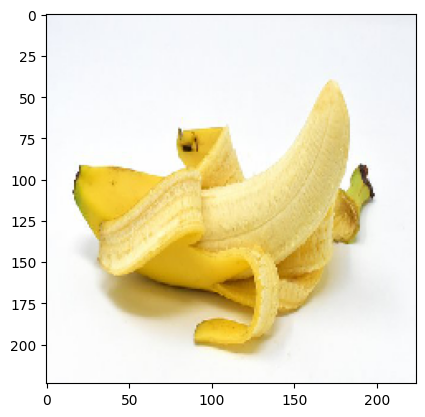

***********************************************************************
Best Match products:


<ipython-input-10-c97f2f258fd0>:80: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for image_path, similarity_score in closest_imgs_zfnet.iteritems():


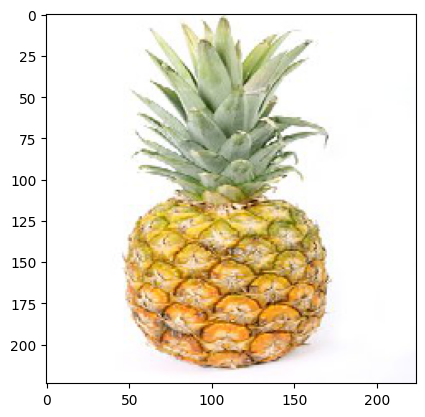

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Pineapple_8.jpg
Similarity Score (ZFNet):  0.9454528093338013
--------------------------------------


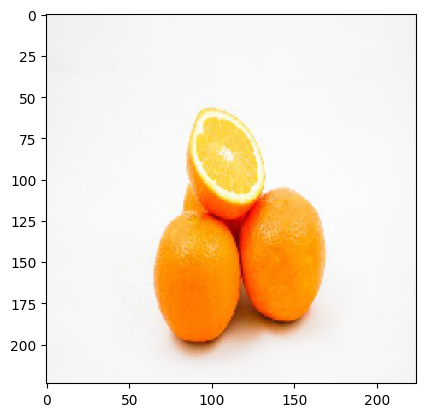

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_8.jpg
Similarity Score (ZFNet):  0.9444810152053833
--------------------------------------


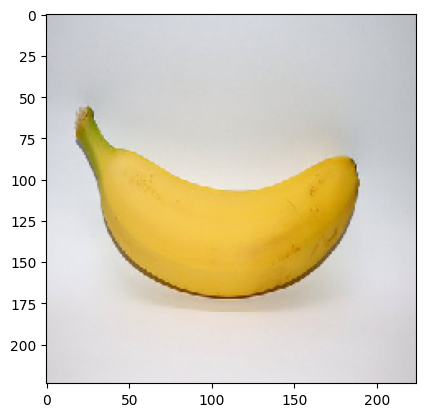

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_14.jpg
Similarity Score (ZFNet):  0.9439219832420349
--------------------------------------


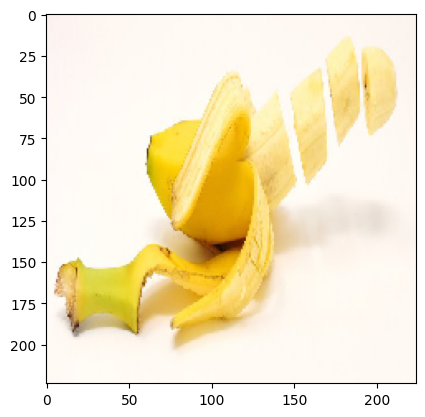

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_15.jpg
Similarity Score (ZFNet):  0.9433708190917969
--------------------------------------


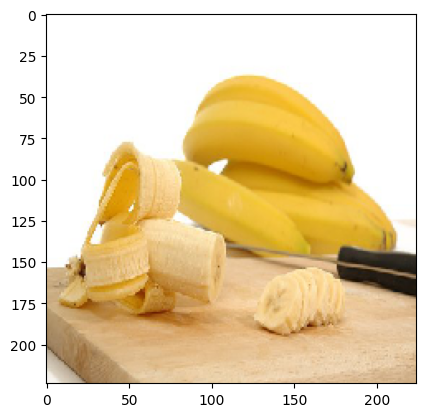

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_45.jpg
Similarity Score (ZFNet):  0.9427670240402222
--------------------------------------


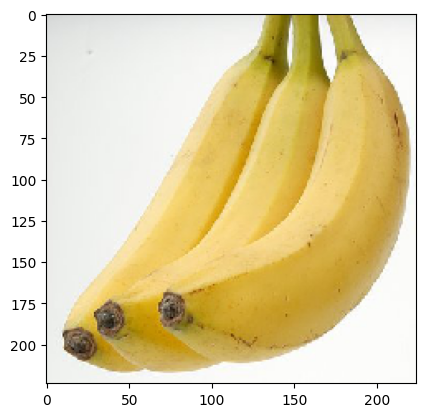

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_27.jpg
Similarity Score (ZFNet):  0.9426629543304443
--------------------------------------


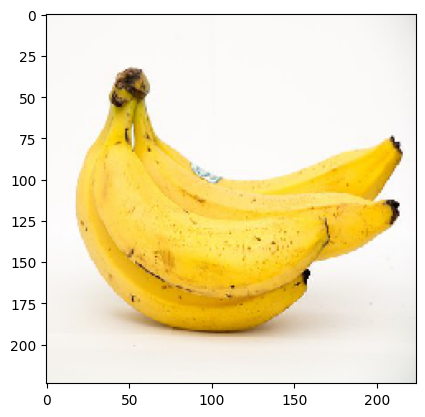

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_6.jpg
Similarity Score (ZFNet):  0.94230055809021
--------------------------------------


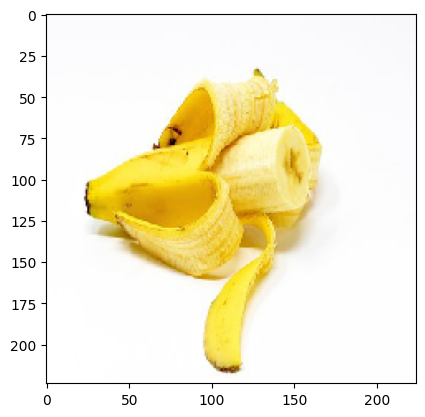

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_13.jpg
Similarity Score (ZFNet):  0.9421373009681702
--------------------------------------


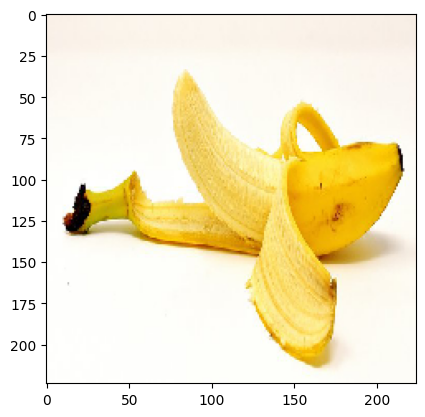

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_11.jpg
Similarity Score (ZFNet):  0.9397411346435547
--------------------------------------


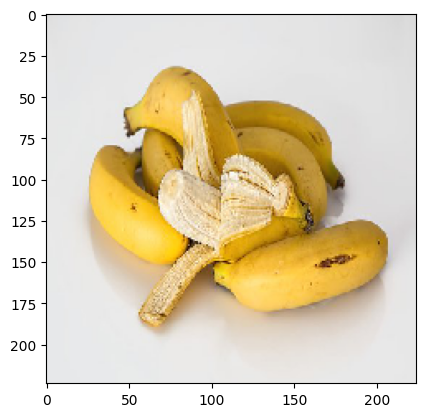

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_2.jpg
Similarity Score (ZFNet):  0.9374676942825317
--------------------------------------


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# Path to the directory containing the images
imgs_path = "/content/drive/MyDrive/Cse_465/Code/Fruits/"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 10  # number of most similar images to retrieve

# Define the ZFNet architecture
zfnet_model = Sequential()
zfnet_model.add(Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=(imgs_model_width, imgs_model_height, 3)))
zfnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))
zfnet_model.add(Conv2D(256, (5, 5), activation='relu'))
zfnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))
zfnet_model.add(Conv2D(384, (3, 3), activation='relu'))
zfnet_model.add(Conv2D(384, (3, 3), activation='relu'))
zfnet_model.add(Conv2D(256, (3, 3), activation='relu'))
zfnet_model.add(MaxPooling2D((3, 3), strides=(2, 2)))
zfnet_model.add(Flatten())
zfnet_model.add(Dense(4096, activation='relu'))
zfnet_model.add(Dense(4096, activation='relu'))

# Load the pre-trained weights for ZFNet (if available)
zfnet_weights_path = "/path/to/zfnet_weights.h5"
if os.path.exists(zfnet_weights_path):
    zfnet_model.load_weights(zfnet_weights_path)

# Display model summary for ZFNet
zfnet_model.summary()

# Function to load and preprocess an image
def preprocess_image(image_path):
    original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
    numpy_image = img_to_array(original)
    processed_image = preprocess_input(np.expand_dims(numpy_image, axis=0).copy())
    return processed_image

# Retrieve the list of image files
files = [os.path.join(imgs_path, x) for x in os.listdir(imgs_path) if x.endswith(("jpg", "jpeg"))]

print("Number of images:", len(files))
print(files)

# Load and preprocess all the images
images_zfnet = np.vstack([preprocess_image(file) for file in files])

# Extract features from the images using ZFNet
imgs_features_zfnet = zfnet_model.predict(images_zfnet)

print("Features successfully extracted!")
print("Number of image features (ZFNet):", imgs_features_zfnet.shape[0])

# Compute cosine similarity between image features (ZFNet)
cos_similarities_zfnet = cosine_similarity(imgs_features_zfnet)

# Create a DataFrame with cosine similarities (ZFNet)
cos_similarities_df_zfnet = pd.DataFrame(cos_similarities_zfnet, columns=files, index=files)

# Function to retrieve most similar products
def retrieve_most_similar_products_zfnet(given_img):
    print("***********************************************************************")
    print("The Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("***********************************************************************")
    print("Best Match products:")

    closest_imgs_zfnet = cos_similarities_df_zfnet[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for image_path, similarity_score in closest_imgs_zfnet.iteritems():
        original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Image Path: ", image_path)
        print("Similarity Score (ZFNet): ", similarity_score)
        print("--------------------------------------")

# Test the function with a given image
retrieve_most_similar_products_zfnet(files[10])


## **InceptionV3**

87910968/87910968 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_5[0][0]']               
 alization)                

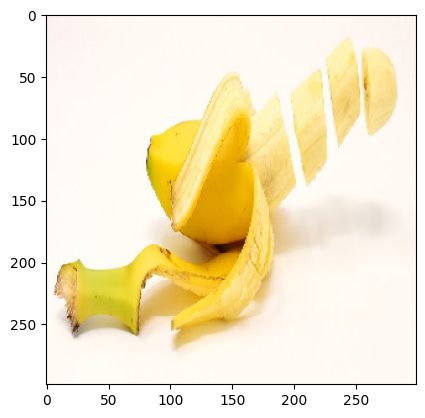

***********************************************************************
Best Match products:


<ipython-input-11-9f2c5753d158>:68: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for image_path, similarity_score in closest_imgs.iteritems():


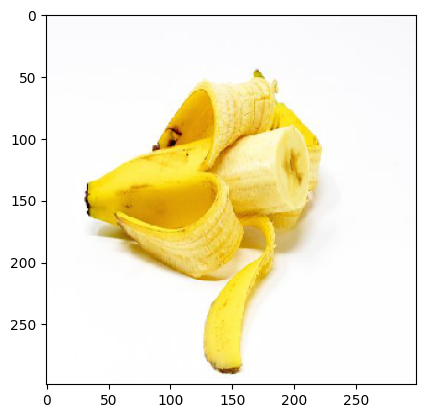

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_13.jpg
Similarity Score:  0.9586860537528992
--------------------------------------


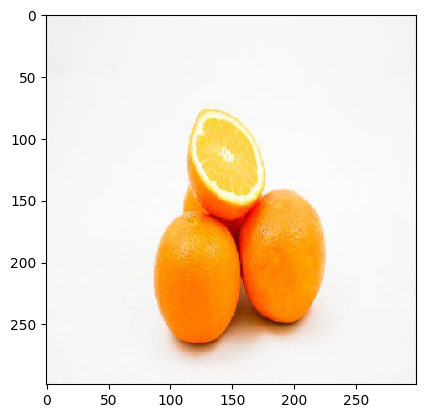

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_8.jpg
Similarity Score:  0.9531421661376953
--------------------------------------


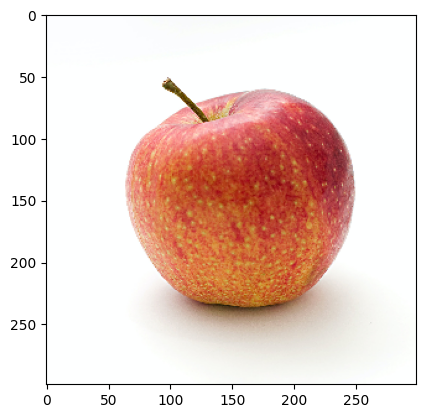

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_2.jpg
Similarity Score:  0.9430059194564819
--------------------------------------


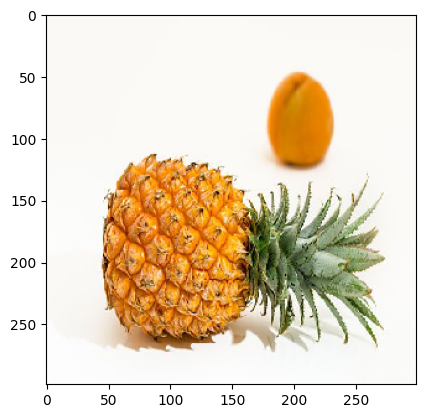

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Pineapple_11.jpg
Similarity Score:  0.9394804835319519
--------------------------------------


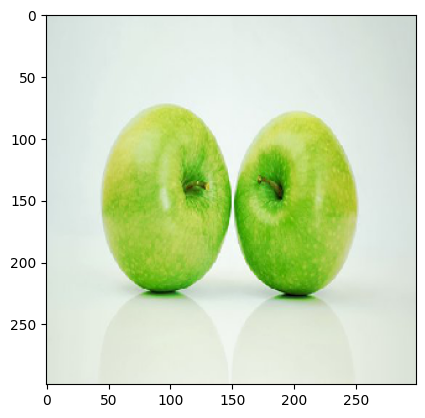

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_25.jpg
Similarity Score:  0.9389337301254272
--------------------------------------


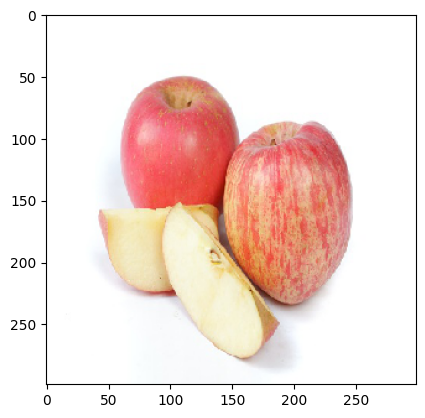

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Apple_4.jpg
Similarity Score:  0.9356824159622192
--------------------------------------


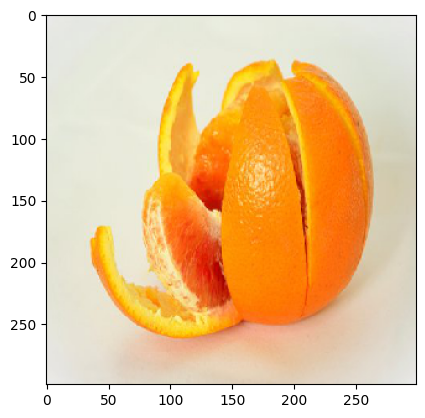

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_39.jpg
Similarity Score:  0.9280043244361877
--------------------------------------


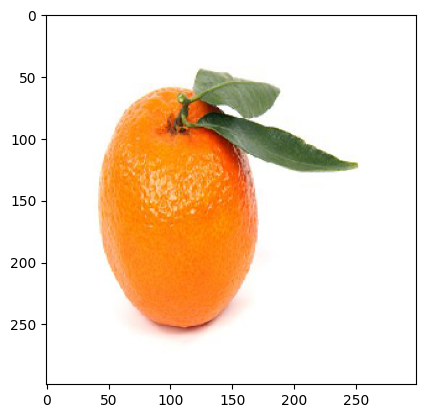

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Orange_37.jpg
Similarity Score:  0.9255555272102356
--------------------------------------


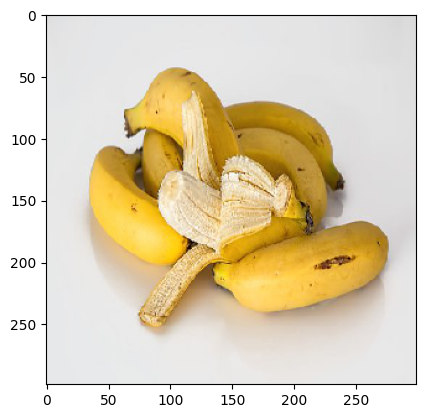

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Banana_2.jpg
Similarity Score:  0.9247846603393555
--------------------------------------


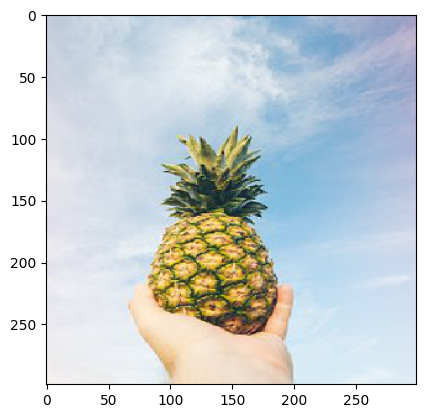

Image Path:  /content/drive/MyDrive/Cse_465/Code/Fruits/Pineapple_58.jpg
Similarity Score:  0.9241976141929626
--------------------------------------


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# Path to the directory containing the images
imgs_path = "/content/drive/MyDrive/Cse_465/Code/Fruits/"
imgs_model_width, imgs_model_height = 299, 299
nb_closest_images = 10  # number of most similar images to retrieve

# Load the pre-trained InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(imgs_model_width, imgs_model_height, 3))

# Create a feature extractor model
feat_extractor = Model(inputs=inception_model.input, outputs=inception_model.get_layer("mixed10").output)

# Display feature extractor model summary
feat_extractor.summary()

# Retrieve the list of image files
files = [os.path.join(imgs_path, x) for x in os.listdir(imgs_path) if x.endswith(("jpg", "jpeg"))]

print("Number of images:", len(files))
print(files)

# Function to load and preprocess an image
def preprocess_image(image_path):
    original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
    numpy_image = img_to_array(original)
    processed_image = preprocess_input(np.expand_dims(numpy_image, axis=0).copy())
    return processed_image

# Load and preprocess all the images
images = np.vstack([preprocess_image(file) for file in files])

# Extract features from the images
imgs_features = feat_extractor.predict(images)

print("Features successfully extracted!")
print("Number of image features:", imgs_features.shape[0])

# # Compute cosine similarity between image features
# cos_similarities = cosine_similarity(imgs_features)

# # Create a DataFrame with cosine similarities
# cos_similarities_df = pd.DataFrame(cos_similarities, columns=files, index=files)
# cos_similarities_df.head()

# Function to retrieve most similar products
def retrieve_most_similar_products(given_img):
    print("***********************************************************************")
    print("The Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("***********************************************************************")
    print("Best Match products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for image_path, similarity_score in closest_imgs.iteritems():
        original = load_img(image_path, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Image Path: ", image_path)
        print("Similarity Score: ", similarity_score)
        print("--------------------------------------")

# Test the function with a given image
retrieve_most_similar_products(files[30])


## **DenseNet121 **

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 7,037,504
Trainable params: 6,953,856
Non-trainable params: 83,648
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121_input (InputLay  [(None, 224, 224, 3)]    0         
 er)                                                             
                                                                 
 densenet121 (Function

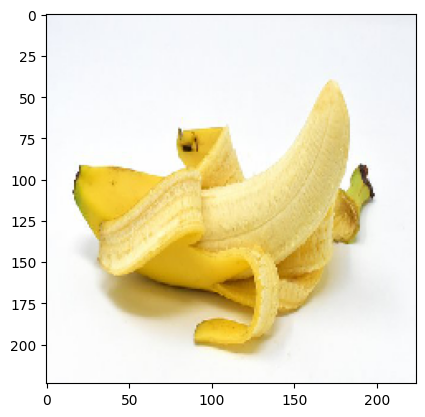

***********************************************************************
Best Match products:


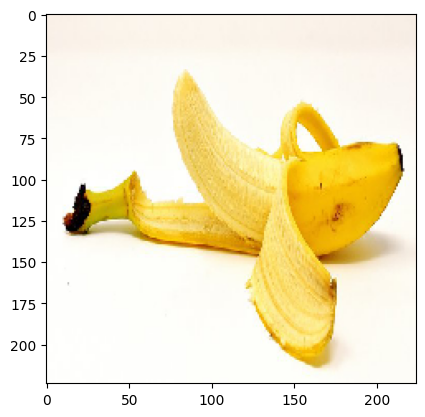

Match score: 0.8424611


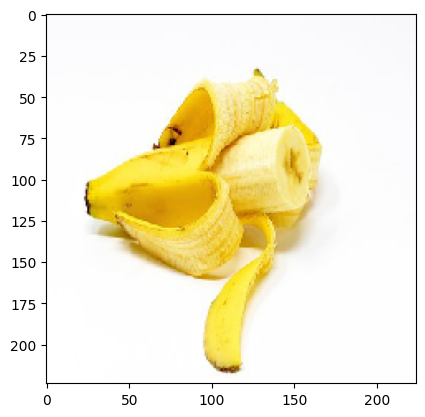

Match score: 0.79224646


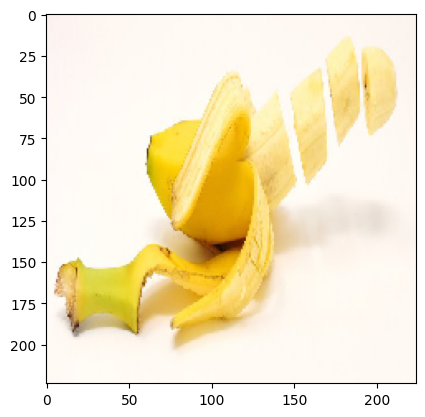

Match score: 0.77586144


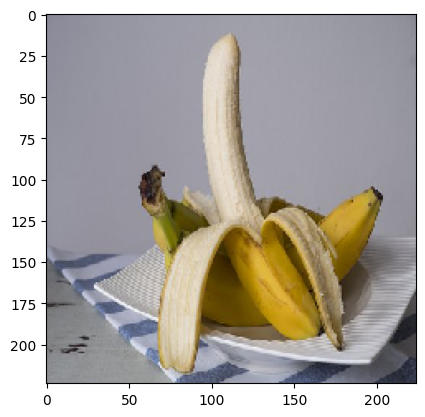

Match score: 0.7677934


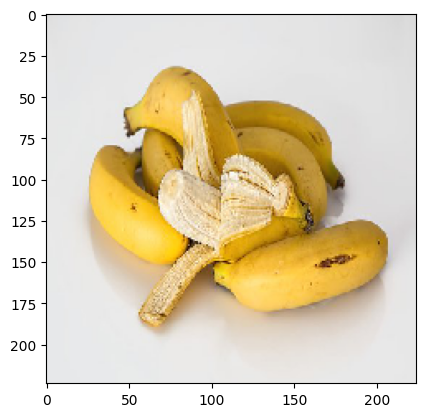

Match score: 0.76169944


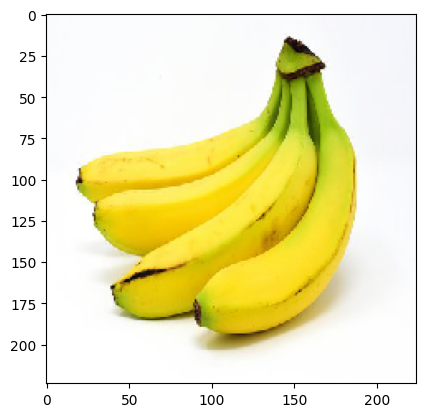

Match score: 0.7577709


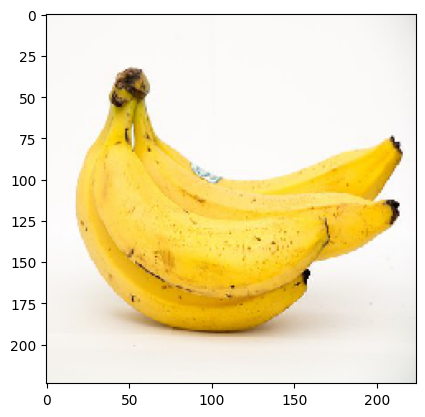

Match score: 0.7237185


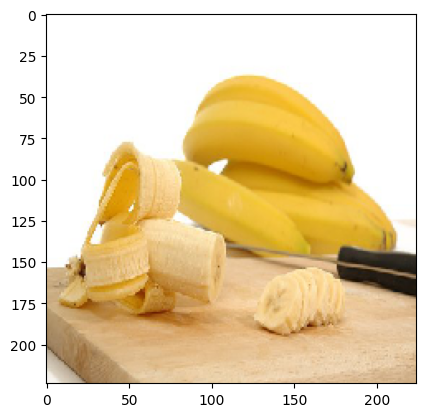

Match score: 0.7226522


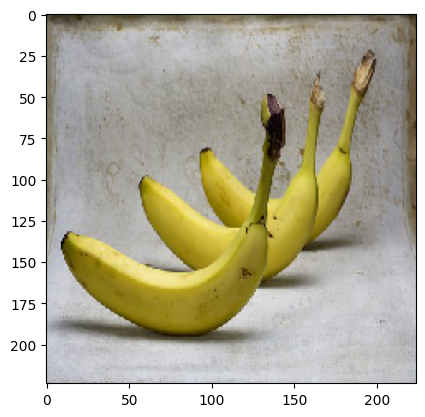

Match score: 0.71421754


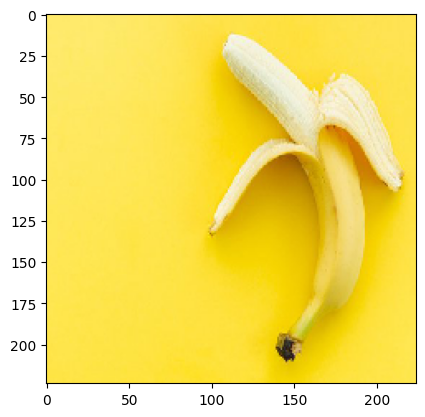

Match score: 0.7076889


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics.pairwise import cosine_similarity

imgs_path = "/content/drive/MyDrive/Cse_465/Code/Fruits/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10  # number of most similar images to retrieve

# Feature extraction using DenseNet121
convlayer = DenseNet121(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

model = Sequential()
model.add(convlayer)
model.add(GlobalAveragePooling2D())

model.summary()

feat_extractor = Model(inputs=model.input, outputs=model.layers[-1].output)

feat_extractor.summary()

# Load and process images
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" or "jpeg" in x]

print("Number of images:", len(files))
print(files)

importedImages = []
for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages.append(image_batch)

images = np.vstack(importedImages)
processed_imgs = preprocess_input(images.copy())

# Extract features from images
imgs_features = feat_extractor.predict(processed_imgs)

print("Features successfully extracted!")
print("Number of image features:", imgs_features.shape)

# Compute cosine similarities
cosSimilarities = cosine_similarity(imgs_features)

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

# Function to retrieve most similar products
def retrieve_most_similar_products(given_img):
    print("***********************************************************************")
    print("The Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("***********************************************************************")
    print("Best Match products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]

    for i in range(0, len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Match score:", closest_imgs_scores[i])

retrieve_most_similar_products(files[10])
